## KNN is Good for Clinical domain

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
df= pd.read_csv('Classified Data', index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
df.isnull().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [6]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


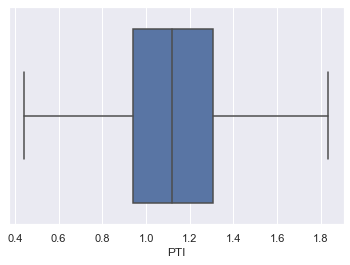

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


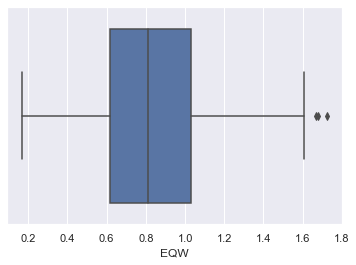

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


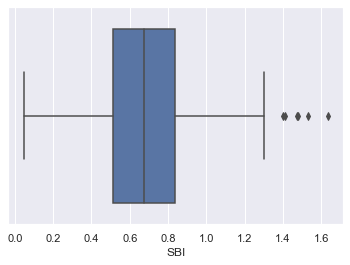

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


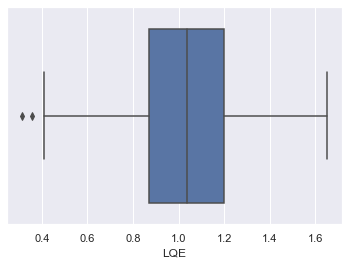

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


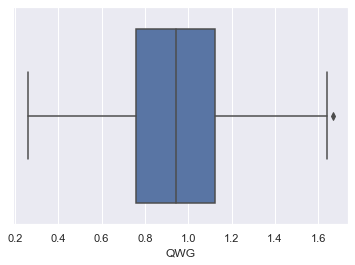

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


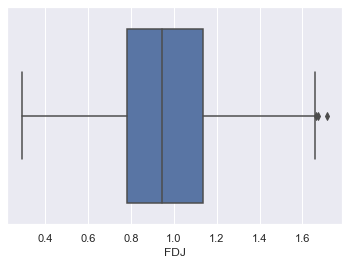

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


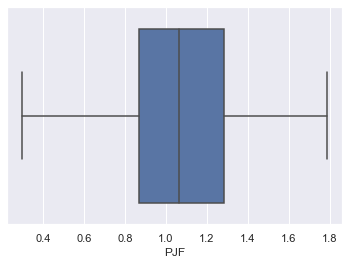

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


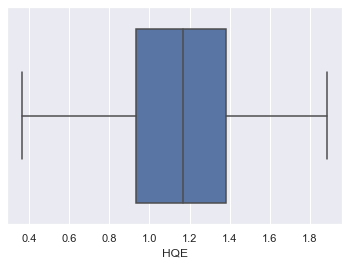

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


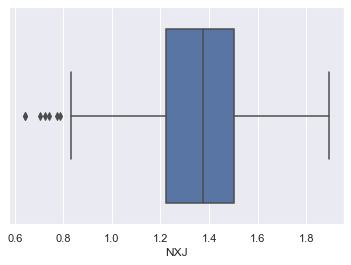

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


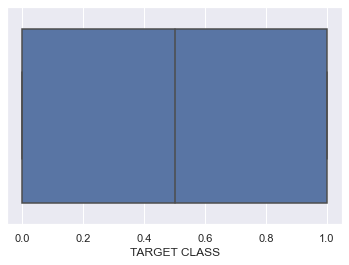

In [8]:
def boxplot(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df.columns)[1:]:
    boxplot(i)

In [9]:
Q1= df.quantile(0.25)
Q3= df.quantile(0.75)
IQR= Q3-Q1
pos_outlier= Q3+1.5*IQR
neg_outlier= Q1-1.5*IQR

In [10]:
df= df[~((df<neg_outlier)|(df>pos_outlier)).any(axis=1)]

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


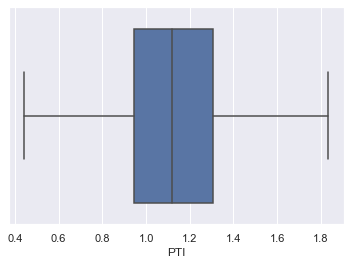

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


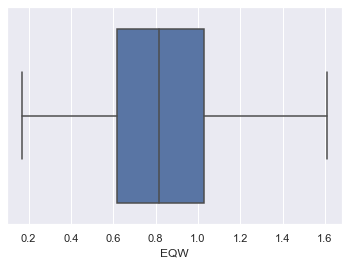

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


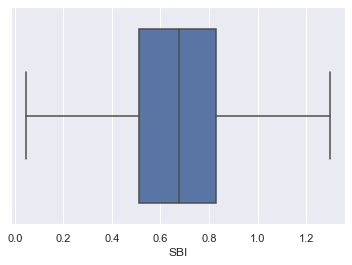

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


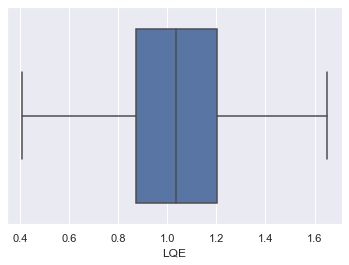

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


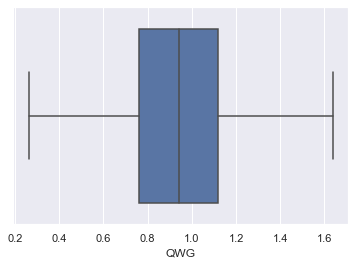

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


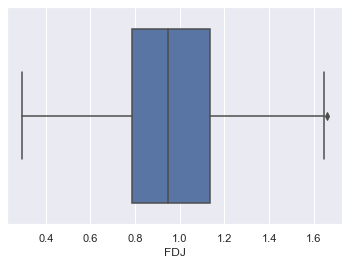

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


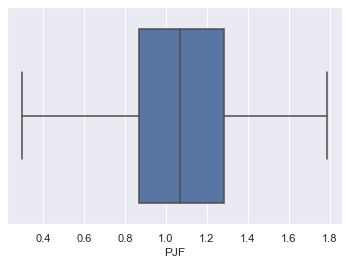

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


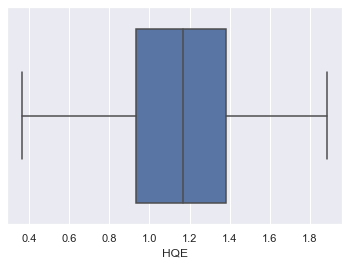

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


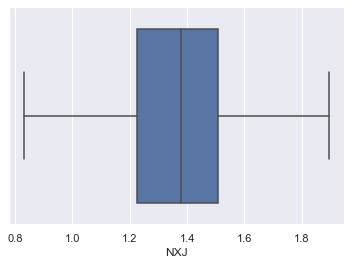

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


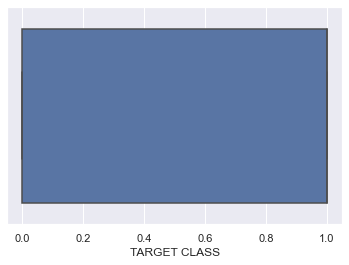

In [11]:
def boxplot(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df.columns)[1:]:
    boxplot(i)

In [12]:
df['TARGET CLASS'].value_counts()

1    490
0    488
Name: TARGET CLASS, dtype: int64

In [13]:
#Split the data in x and y
x= df.drop(['TARGET CLASS'], axis=1)
y= df['TARGET CLASS']

In [14]:
#Split the data in train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=1)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(684, 10)
(294, 10)
(684,)
(294,)


## KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred_train= knn.predict(x_train)
y_pred_test= knn.predict(x_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_train, y_pred_train))
print('..........................................')
print(classification_report(y_test, y_pred_test))
print('..........................................')
print(confusion_matrix(y_train, y_pred_train))
print('..........................................')
print(confusion_matrix(y_test, y_pred_test))
print('..........................................')
print(accuracy_score(y_train, y_pred_train))
print('..........................................')
print(accuracy_score(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       338
           1       0.93      0.96      0.95       346

    accuracy                           0.95       684
   macro avg       0.95      0.95      0.95       684
weighted avg       0.95      0.95      0.95       684

..........................................
              precision    recall  f1-score   support

           0       0.99      0.91      0.94       150
           1       0.91      0.99      0.95       144

    accuracy                           0.95       294
   macro avg       0.95      0.95      0.95       294
weighted avg       0.95      0.95      0.95       294

..........................................
[[314  24]
 [ 13 333]]
..........................................
[[136  14]
 [  2 142]]
..........................................
0.945906432748538
..........................................
0.9455782312925171


## Choose best K value

In [33]:
error_rate=[]

for i in range(1,50):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i= knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [34]:
error_rate

[0.07482993197278912,
 0.06462585034013606,
 0.05442176870748299,
 0.030612244897959183,
 0.05442176870748299,
 0.034013605442176874,
 0.04081632653061224,
 0.03741496598639456,
 0.04421768707482993,
 0.03741496598639456,
 0.03741496598639456,
 0.034013605442176874,
 0.034013605442176874,
 0.034013605442176874,
 0.03741496598639456,
 0.034013605442176874,
 0.030612244897959183,
 0.030612244897959183,
 0.034013605442176874,
 0.034013605442176874,
 0.04081632653061224,
 0.03741496598639456,
 0.047619047619047616,
 0.04421768707482993,
 0.04421768707482993,
 0.03741496598639456,
 0.04081632653061224,
 0.03741496598639456,
 0.04081632653061224,
 0.034013605442176874,
 0.03741496598639456,
 0.034013605442176874,
 0.034013605442176874,
 0.030612244897959183,
 0.03741496598639456,
 0.034013605442176874,
 0.04081632653061224,
 0.03741496598639456,
 0.03741496598639456,
 0.03741496598639456,
 0.04081632653061224,
 0.034013605442176874,
 0.047619047619047616,
 0.04081632653061224,
 0.04761904761

In [35]:
len(error_rate)

49

Text(0, 0.5, 'Error rate')

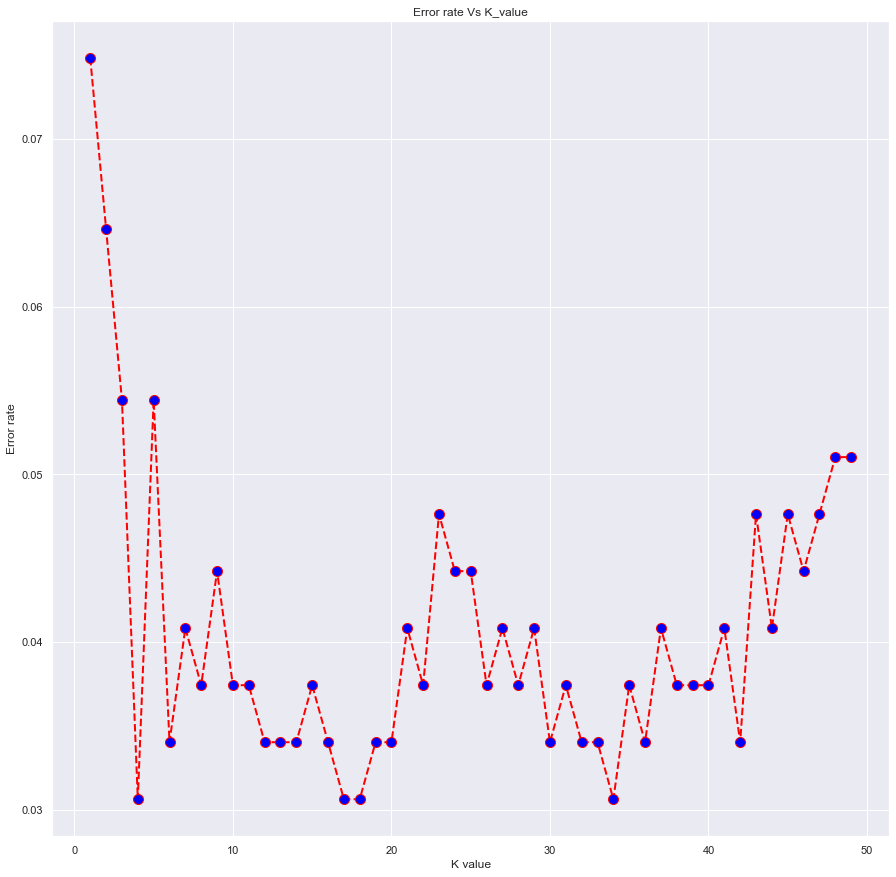

In [36]:
plt.figure(figsize=(15,15))
plt.plot(range(1,50), error_rate, color= 'red', linewidth= 2, linestyle='dashed', marker='o', markerfacecolor= 'blue', markersize=10)
plt.title('Error rate Vs K_value')
plt.xlabel('K value')
plt.ylabel('Error rate')

- From the above graph, select point having lowest error rate and having odd value.
- Also, after n=17, fluctuation in error rate is less.

In [26]:
# n= 17
knn_17= KNeighborsClassifier(n_neighbors=17)
knn_17.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [27]:
y_pred_train_17= knn_17.predict(x_train)
y_pred_test_17= knn_17.predict(x_test)

In [28]:
print(classification_report(y_train, y_pred_train_17))
print('..........................................')
print(classification_report(y_test, y_pred_test_17))
print('..........................................')
print(confusion_matrix(y_train, y_pred_train_17))
print('..........................................')
print(confusion_matrix(y_test, y_pred_test_17))
print('..........................................')
print(accuracy_score(y_train, y_pred_train_17))
print('..........................................')
print(accuracy_score(y_test, y_pred_test_17))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       338
           1       0.93      0.95      0.94       346

    accuracy                           0.94       684
   macro avg       0.94      0.94      0.94       684
weighted avg       0.94      0.94      0.94       684

..........................................
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       150
           1       0.95      0.99      0.97       144

    accuracy                           0.97       294
   macro avg       0.97      0.97      0.97       294
weighted avg       0.97      0.97      0.97       294

..........................................
[[312  26]
 [ 18 328]]
..........................................
[[142   8]
 [  1 143]]
..........................................
0.935672514619883
..........................................
0.9693877551020408
